In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

plt.rcParams['figure.figsize'] = [20, 8]
plt.rcParams['figure.dpi'] = 100

pd.options.display.max_rows = 200

In [3]:
plant_1_generation = pd.read_csv("dataset/Plant_1_Generation_Data.csv")
plant_1_weaSensor = pd.read_csv("dataset/Plant_1_Weather_Sensor_Data.csv")
plant_2_generation = pd.read_csv("dataset/Plant_2_Generation_Data.csv")
plant_2_weaSensor = pd.read_csv("dataset/Plant_2_Weather_Sensor_Data.csv")

In [4]:
plant_1_generation.describe()
plant_1_generation['DATETIME'] = pd.to_datetime(plant_1_generation['DATE_TIME'], format='%d-%m-%Y %H:%M')

In [5]:
#plant_1_weaSensor 
plant_1_weaSensor['DATETIME'] = pd.to_datetime(plant_1_weaSensor['DATE_TIME'], format='%Y-%m-%d %H:%M:%S')

In [6]:
plant_2_generation

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,2020-05-15 00:00:00,4136001,4UPUqMRk7TRMgml,0.0,0.0,9425.000000,2.429011e+06
1,2020-05-15 00:00:00,4136001,81aHJ1q11NBPMrL,0.0,0.0,0.000000,1.215279e+09
2,2020-05-15 00:00:00,4136001,9kRcWv60rDACzjR,0.0,0.0,3075.333333,2.247720e+09
3,2020-05-15 00:00:00,4136001,Et9kgGMDl729KT4,0.0,0.0,269.933333,1.704250e+06
4,2020-05-15 00:00:00,4136001,IQ2d7wF4YD8zU1Q,0.0,0.0,3177.000000,1.994153e+07
...,...,...,...,...,...,...,...
67693,2020-06-17 23:45:00,4136001,q49J1IKaHRwDQnt,0.0,0.0,4157.000000,5.207580e+05
67694,2020-06-17 23:45:00,4136001,rrq4fwE8jgrTyWY,0.0,0.0,3931.000000,1.211314e+08
67695,2020-06-17 23:45:00,4136001,vOuJvMaM2sgwLmb,0.0,0.0,4322.000000,2.427691e+06
67696,2020-06-17 23:45:00,4136001,xMbIugepa2P7lBB,0.0,0.0,4218.000000,1.068964e+08


In [7]:
plant_2_weaSensor

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,4136001,iq8k7ZNt4Mwm3w0,27.004764,25.060789,0.0
1,2020-05-15 00:15:00,4136001,iq8k7ZNt4Mwm3w0,26.880811,24.421869,0.0
2,2020-05-15 00:30:00,4136001,iq8k7ZNt4Mwm3w0,26.682055,24.427290,0.0
3,2020-05-15 00:45:00,4136001,iq8k7ZNt4Mwm3w0,26.500589,24.420678,0.0
4,2020-05-15 01:00:00,4136001,iq8k7ZNt4Mwm3w0,26.596148,25.088210,0.0
...,...,...,...,...,...,...
3254,2020-06-17 22:45:00,4136001,iq8k7ZNt4Mwm3w0,23.511703,22.856201,0.0
3255,2020-06-17 23:00:00,4136001,iq8k7ZNt4Mwm3w0,23.482282,22.744190,0.0
3256,2020-06-17 23:15:00,4136001,iq8k7ZNt4Mwm3w0,23.354743,22.492245,0.0
3257,2020-06-17 23:30:00,4136001,iq8k7ZNt4Mwm3w0,23.291048,22.373909,0.0


To keep in mind dataset creator on the collection process: 

**Power generation and sensor data gathered at 15 minutes intervals over a 34 day period. Generation data collected at inverter level, while the sensor data is at the plant level.**

## Checking generation on a single plant


### Generation evolution

<Axes: xlabel='DATE_TIME'>

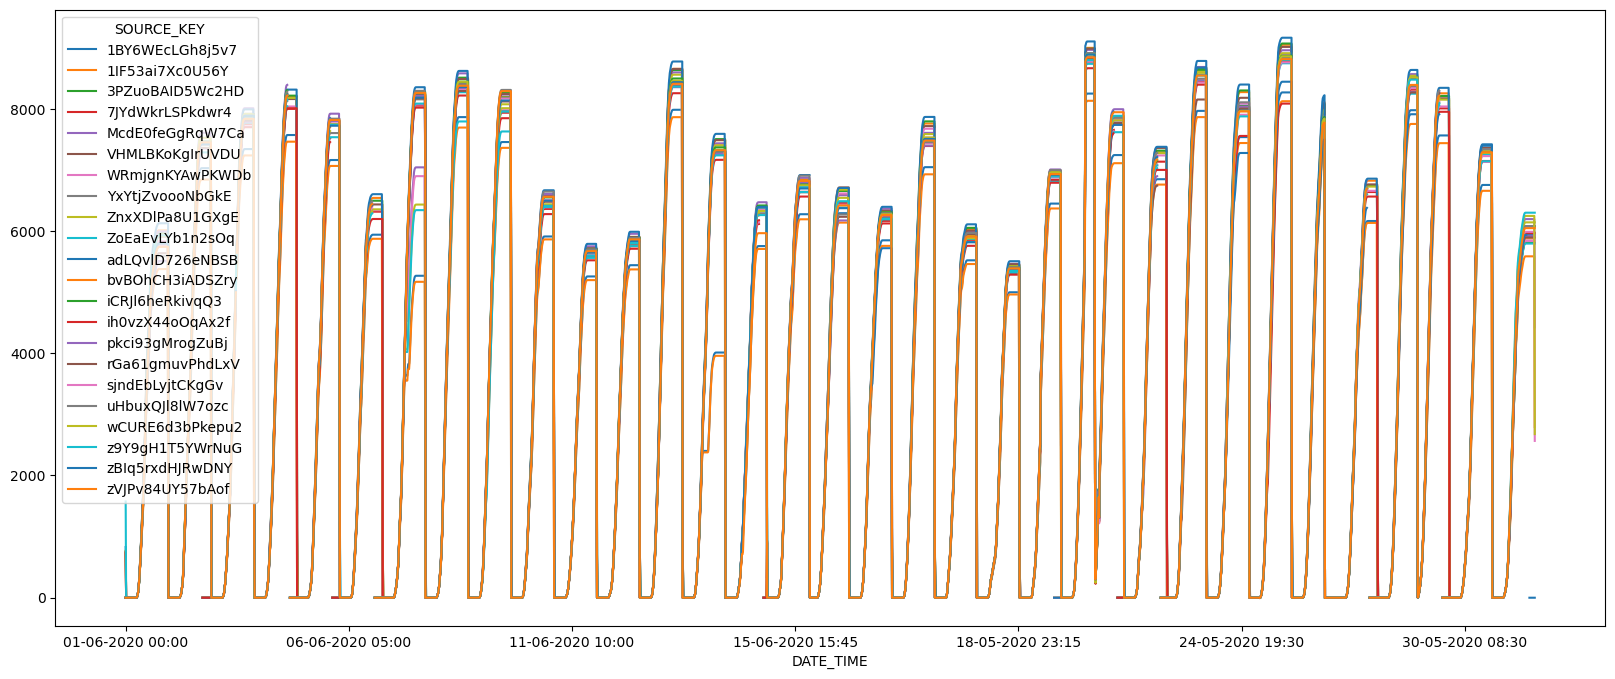

In [8]:
plant_1_generation.pivot_table(index='DATE_TIME', columns='SOURCE_KEY', values="DAILY_YIELD").plot()


<Axes: xlabel='DATE'>

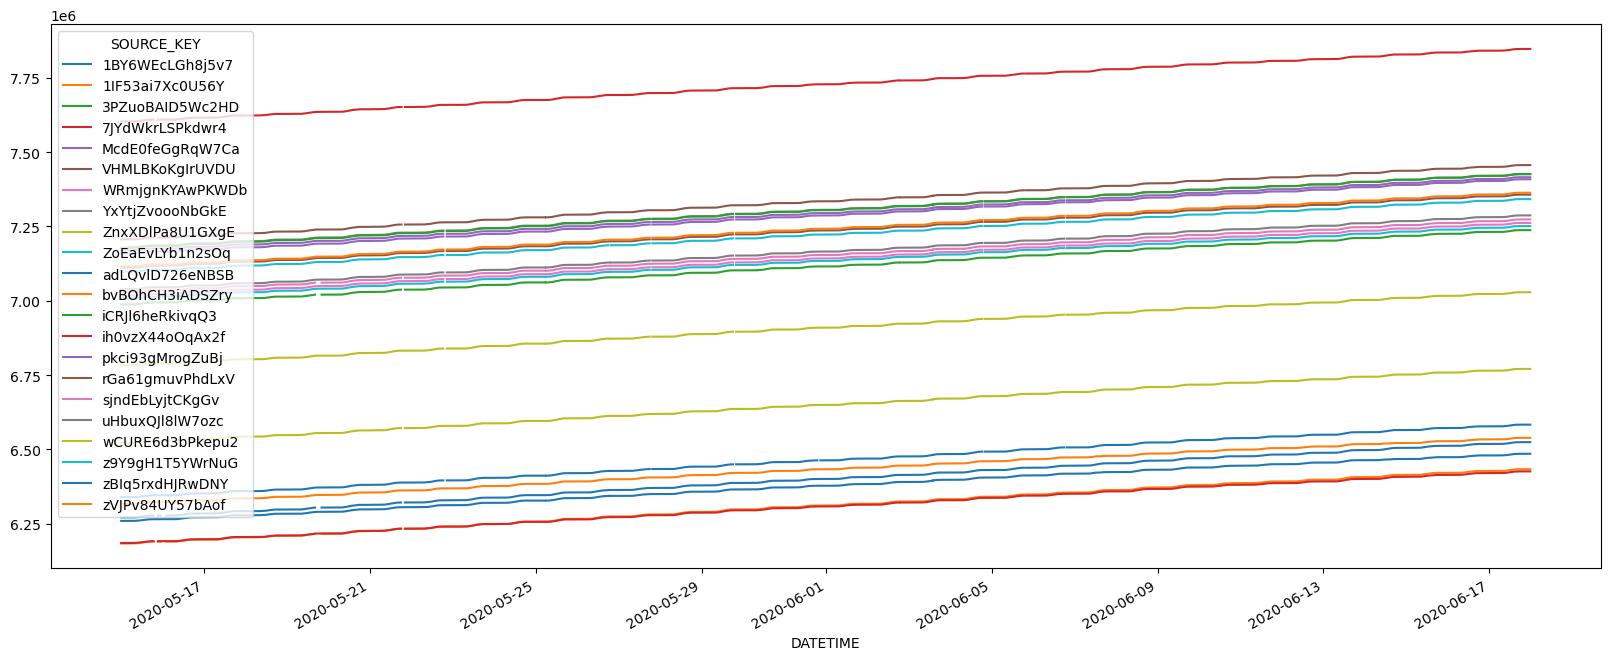

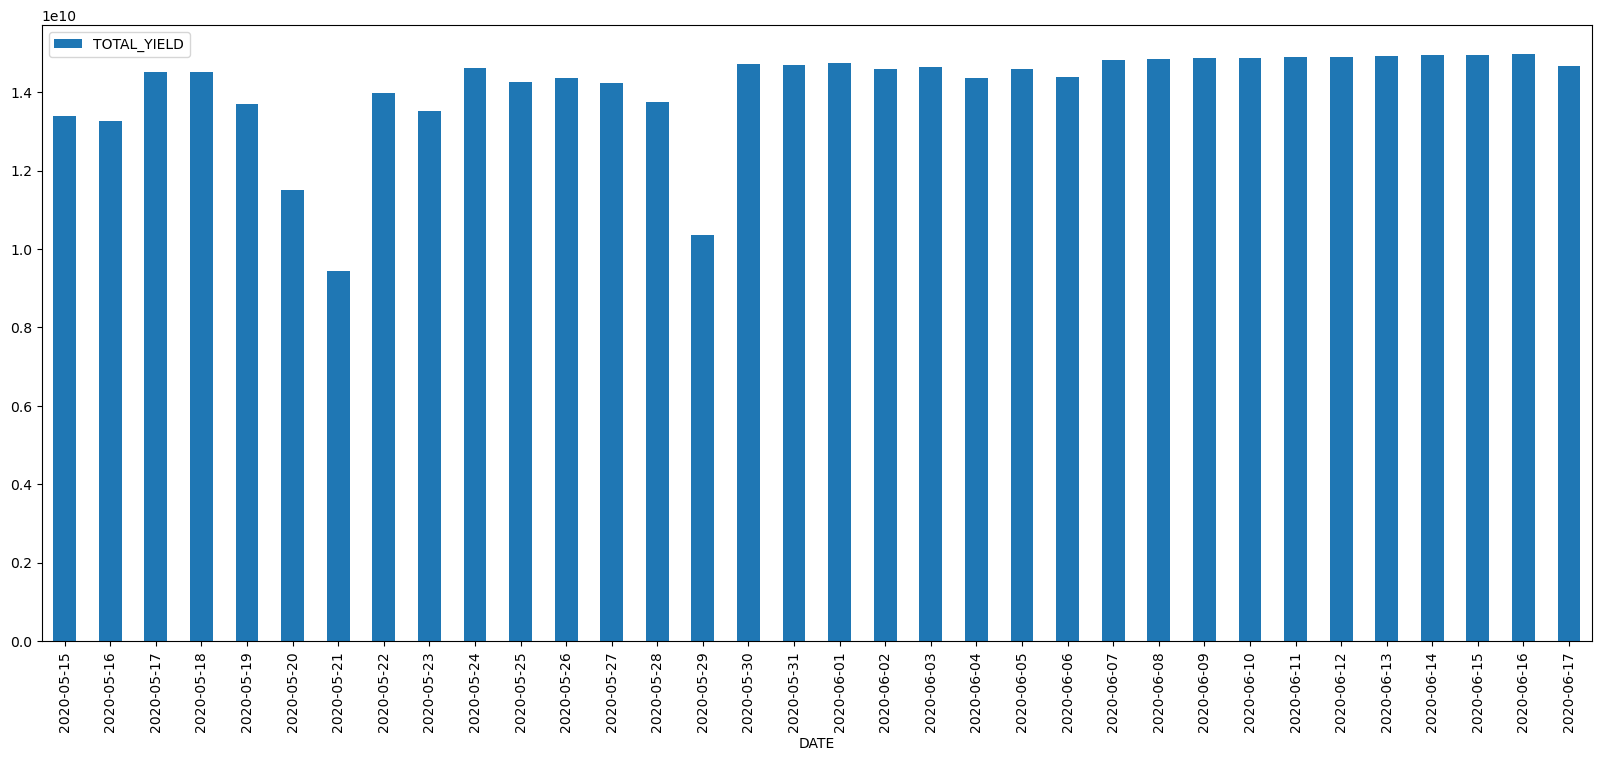

In [9]:
plant_1_generation.pivot_table(index='DATETIME', columns='SOURCE_KEY', values="TOTAL_YIELD").plot()
plant_1_generation['DATE'] = plant_1_generation['DATETIME'].dt.date
plant_1_generation[['DATE', 'TOTAL_YIELD']].groupby('DATE').sum().plot.bar()


We can see that a few arrays are producing less than others, and there was a lower production on few days (like the 21-05-2020)

### Checking on a 24 basis 

Now that we have a better vision on a macro size, time to dig onto 24 hours basis

#### AC/DC power generation over a day

<Axes: xlabel='TIME'>

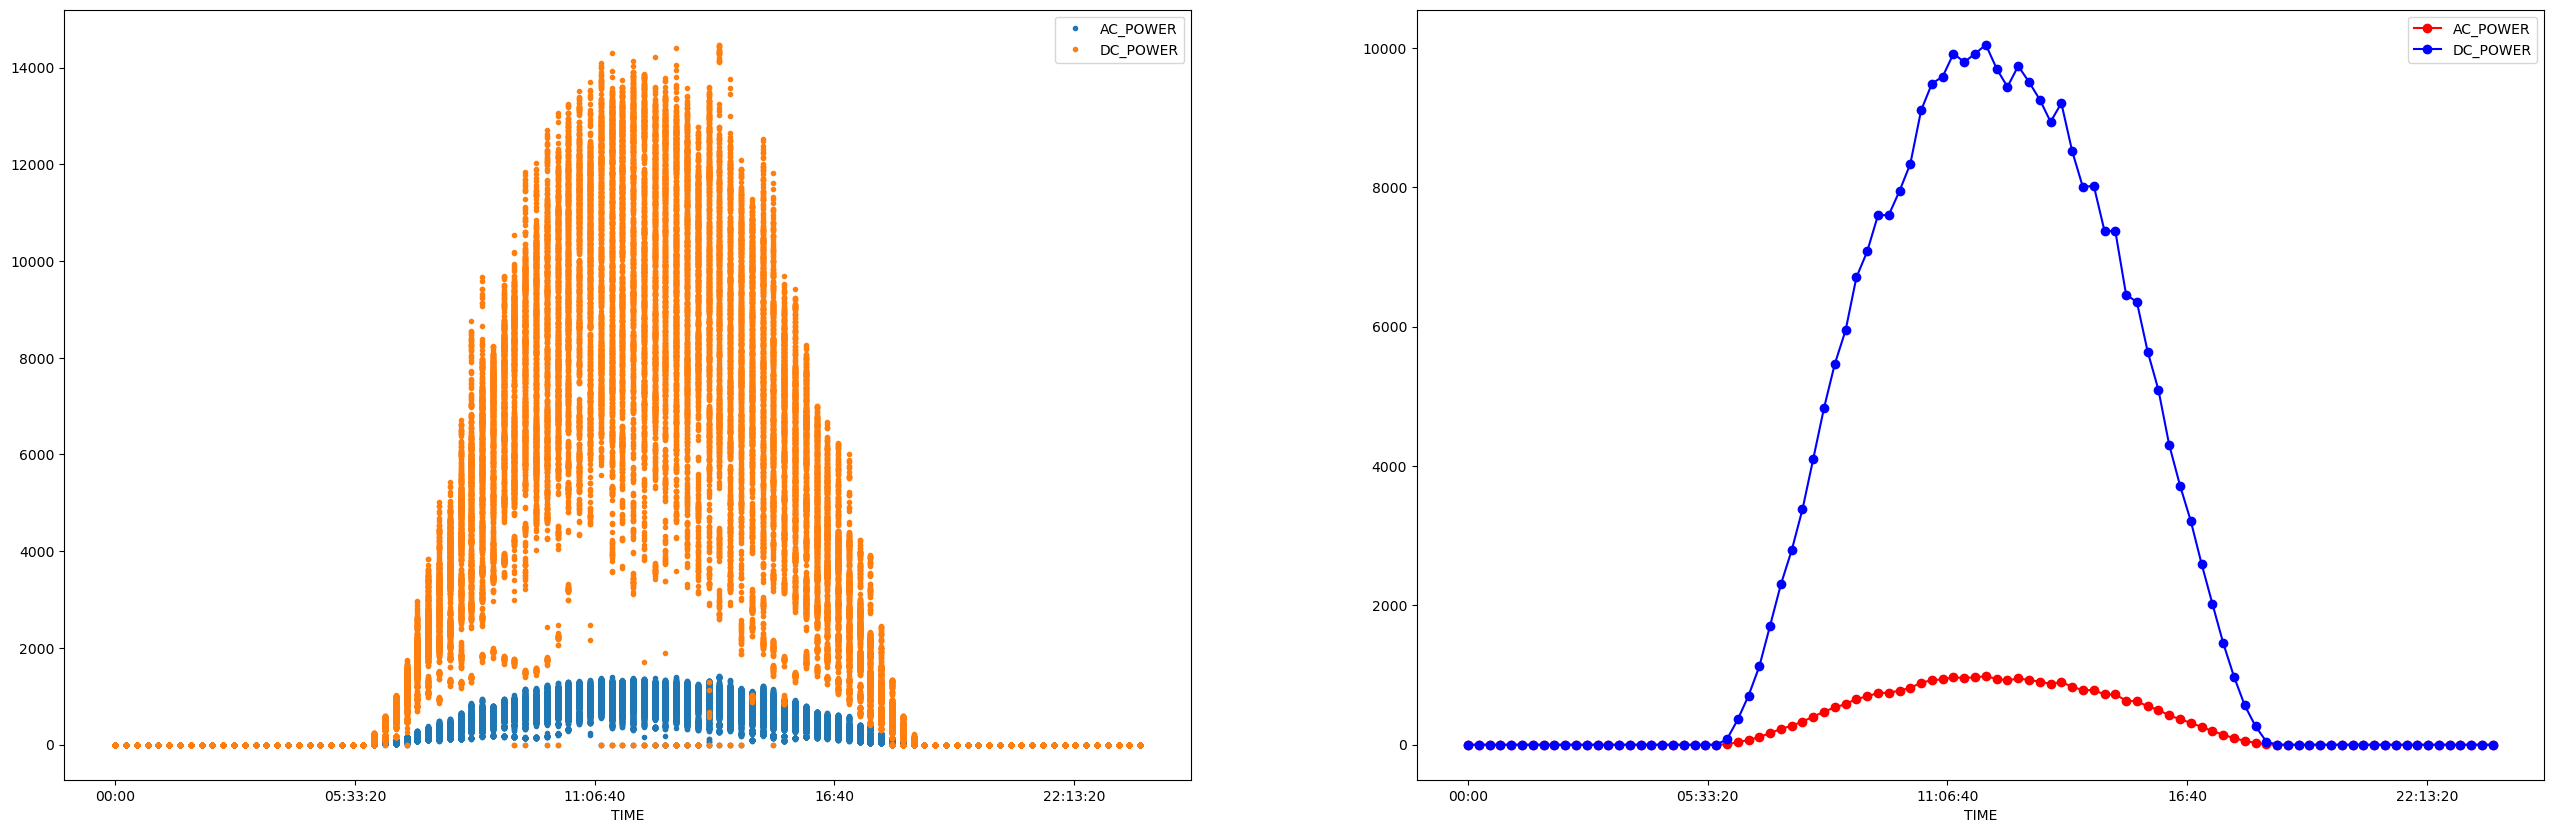

In [10]:
p1_g_24 = plant_1_generation
p1_g_24['TIME'] = p1_g_24['DATETIME'].dt.time

p1_g_24_meanLine = p1_g_24.groupby("TIME")[['AC_POWER', 'DC_POWER']].mean().reset_index()

fig, axes = plt.subplots(nrows=1, ncols=2)
p1_g_24.plot(x='TIME', y=['AC_POWER','DC_POWER'], style='.', ax=axes[0], figsize=(32,10))
p1_g_24_meanLine.plot(x='TIME', y=['AC_POWER', 'DC_POWER'], marker='o', ax=axes[1], color=['red', 'blue'])


Even though we have sporadics data and some few outliers dots, the overall capacity look good, but with previous graphs, we can start to make an hypothesis on some arrays not working properly.
Let's have a look at the sensors data before digging into this.

## Sensors for plant 1   

### Temperature

#### Evolution & Overall temp over the days

C:\Users\Shadow\AppData\Local\Temp\ipykernel_7924\3726164729.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p1_sen_outside['DATE'] = p1_sen_outside['DATETIME'].dt.date
C:\Users\Shadow\AppData\Local\Temp\ipykernel_7924\3726164729.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p1_sen_outside['AMBIENT_T_SMOOTHED'] = p1_sen_outside['AMBIENT_TEMPERATURE'].rolling(window=8).mean()


<Axes: xlabel='DATETIME'>

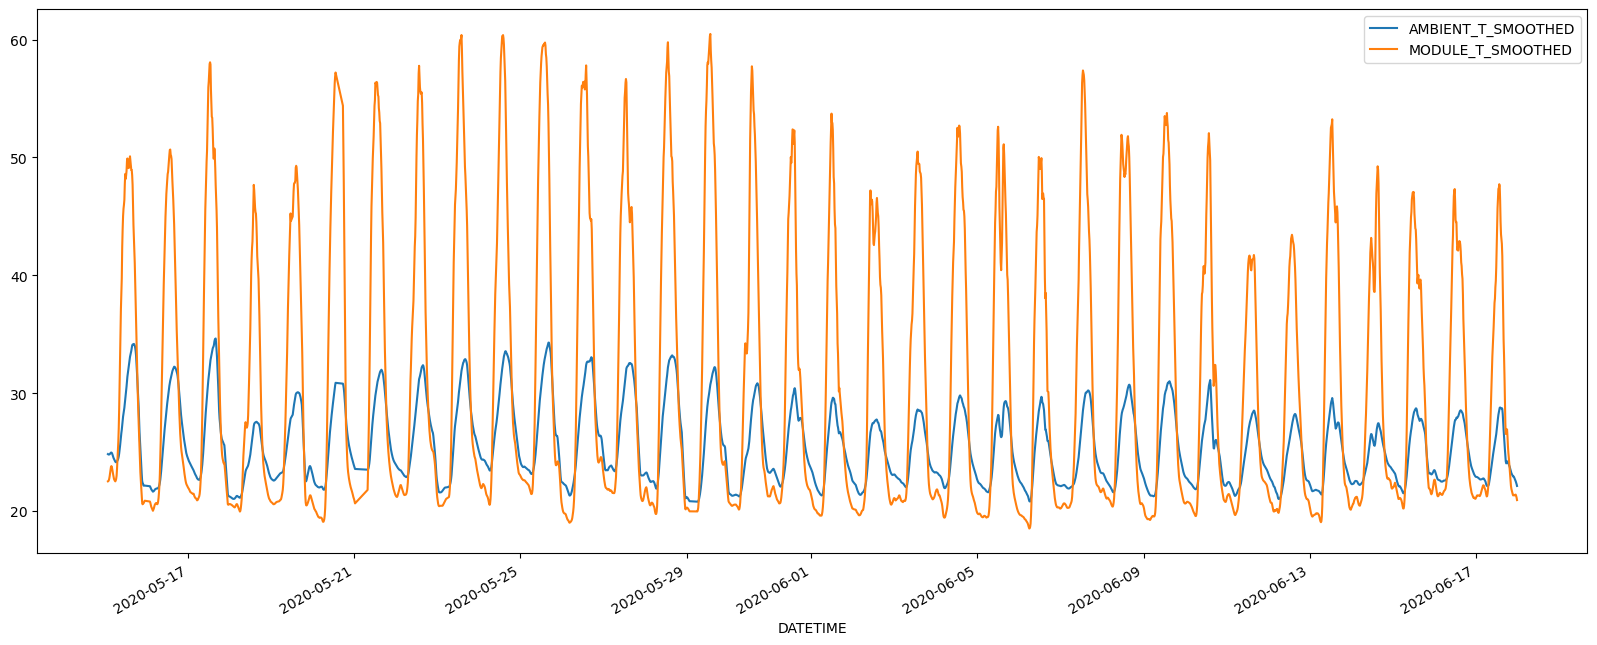

In [11]:
p1_sen_outside = plant_1_weaSensor[['DATETIME', 'AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE', 'IRRADIATION']]
p1_sen_outside['DATE'] = p1_sen_outside['DATETIME'].dt.date
# p1_sen_outside.plot(x='DATETIME', y=['AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE'], style='-.')

p1_sen_outside['AMBIENT_T_SMOOTHED'] = p1_sen_outside['AMBIENT_TEMPERATURE'].rolling(window=8).mean()
p1_sen_outside['MODULE_T_SMOOTHED'] = p1_sen_outside['MODULE_TEMPERATURE'].rolling(window=8).mean()
p1_sen_outside.plot(x='DATETIME', y=['AMBIENT_T_SMOOTHED', 'MODULE_T_SMOOTHED'])

<Axes: xlabel='DATE'>

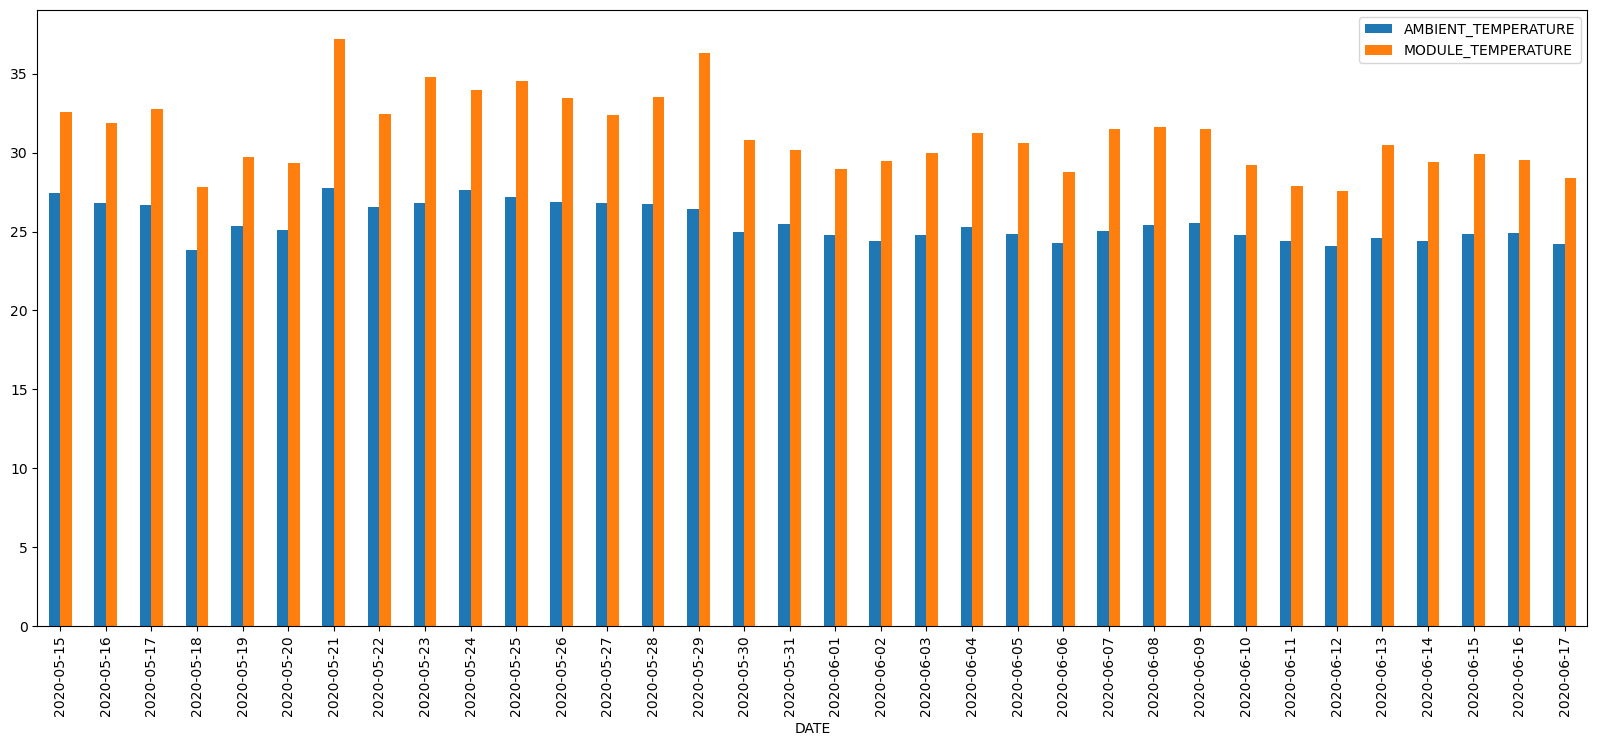

In [12]:
# Temperature 
# fig2, axes2 = plt.subplots(nrows=1, ncols=2)
# p1_sen_outside.plot(x='DATE', y=['AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE'], style='-.', axes2=[0])
p1_sen_outside[['DATE', 'AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE']].groupby('DATE').mean().reset_index().plot.bar(x='DATE', y=['AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE'])


<Axes: >

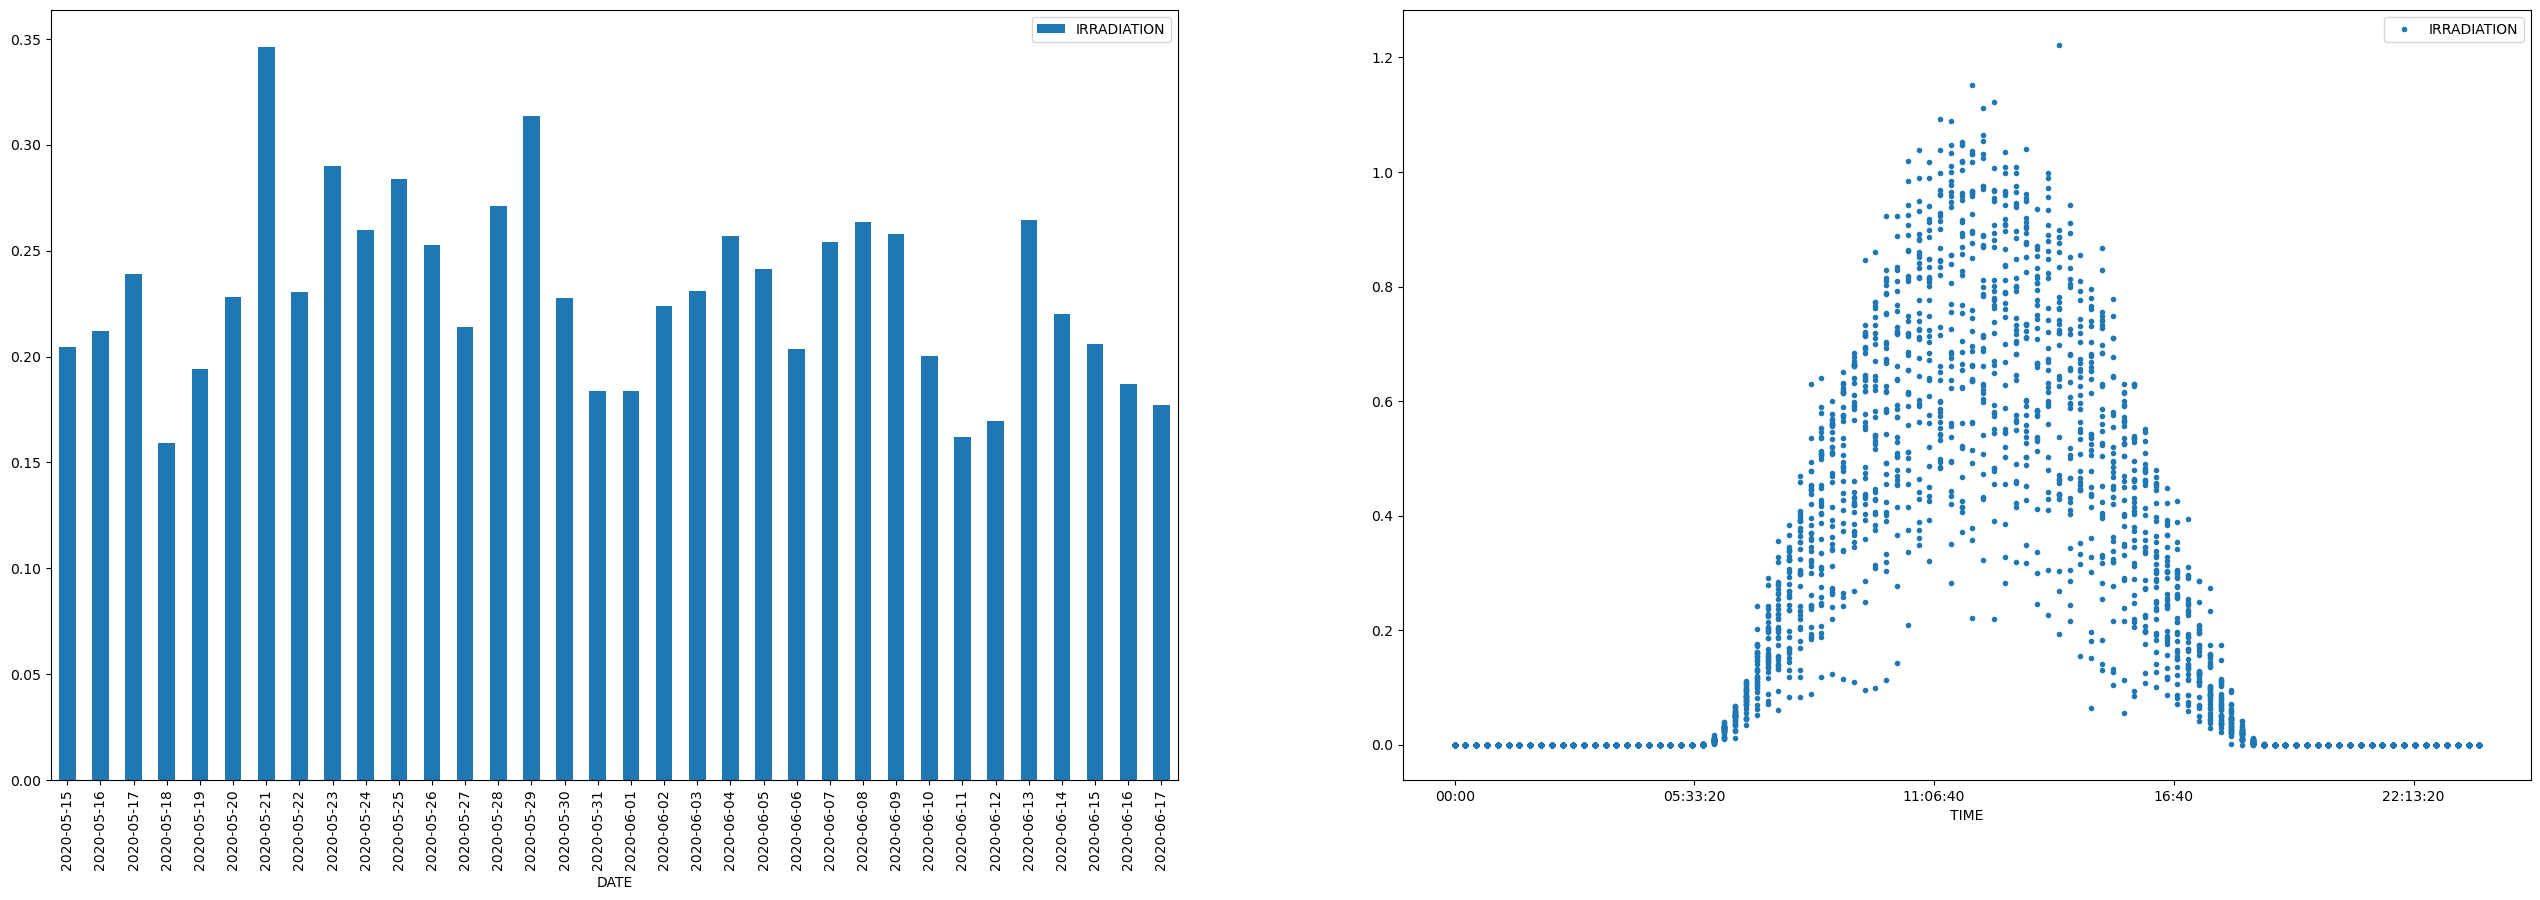

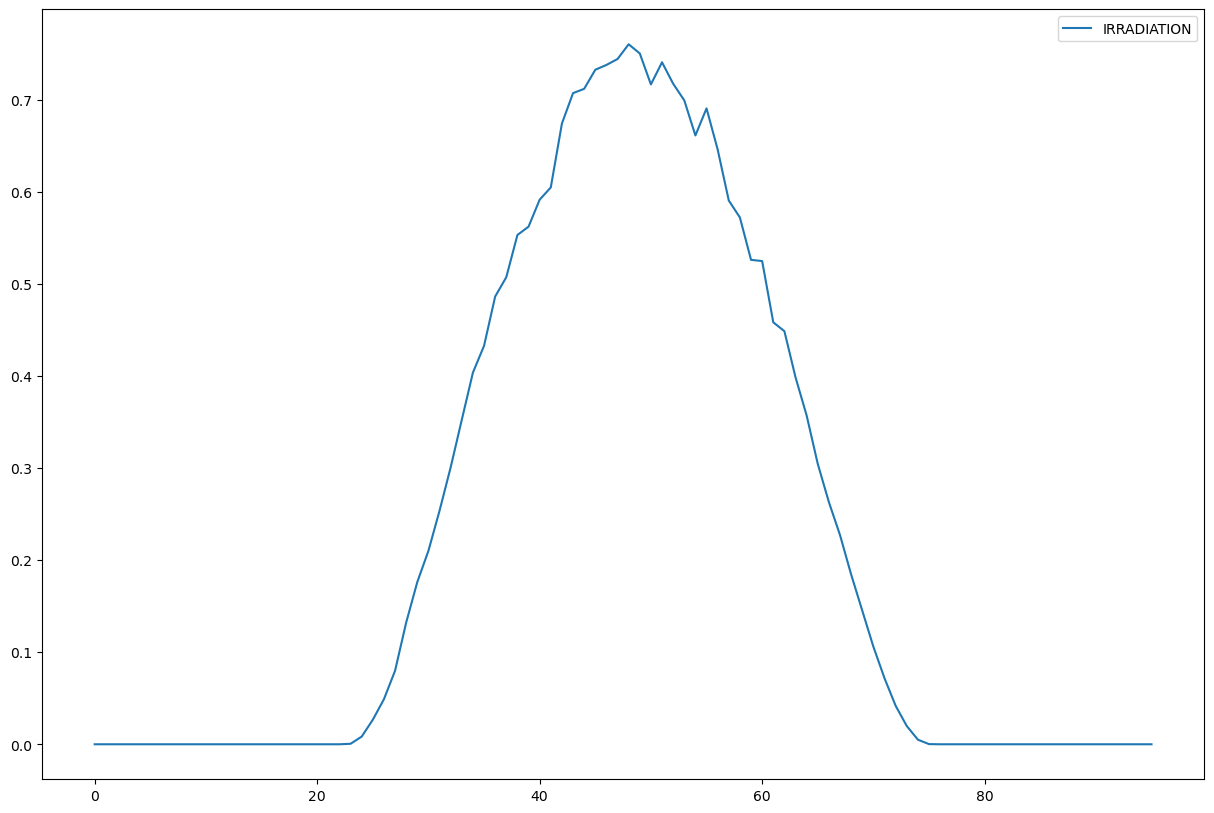

In [53]:
fig, axes= plt.subplots(nrows=1, ncols=2)
p1_sen_outside.groupby('DATE')[['IRRADIATION']].mean().plot.bar(ax=axes[0], figsize=(32,10))
p1_sen_outside['TIME'] = p1_sen_outside['DATETIME'].dt.time
p1_sen_outside.plot(x='TIME', y='IRRADIATION', style='.', ax=axes[1])
p1_sen_outside.groupby('TIME')[['IRRADIATION']].mean().reset_index().plot(figsize=(15,10))

We can see the normal daylight irradiation touching the plant increasing and peaking at noon.
Since irradiation is directly linked to sunlight hence temperature increasing, it can be seen on previous graphs that on high irradiation days, the temperature is increasing.

We can also see some outliers compared to the mean of all cells.


### Checking the power generation 

Since solar cells are converting DC power into AC power, the converstion rate can give us an idea of the evolution and rate of production.

For estimating, I'll use the previously done mean lines, fist on the whole time, and in second, on a daily basis.



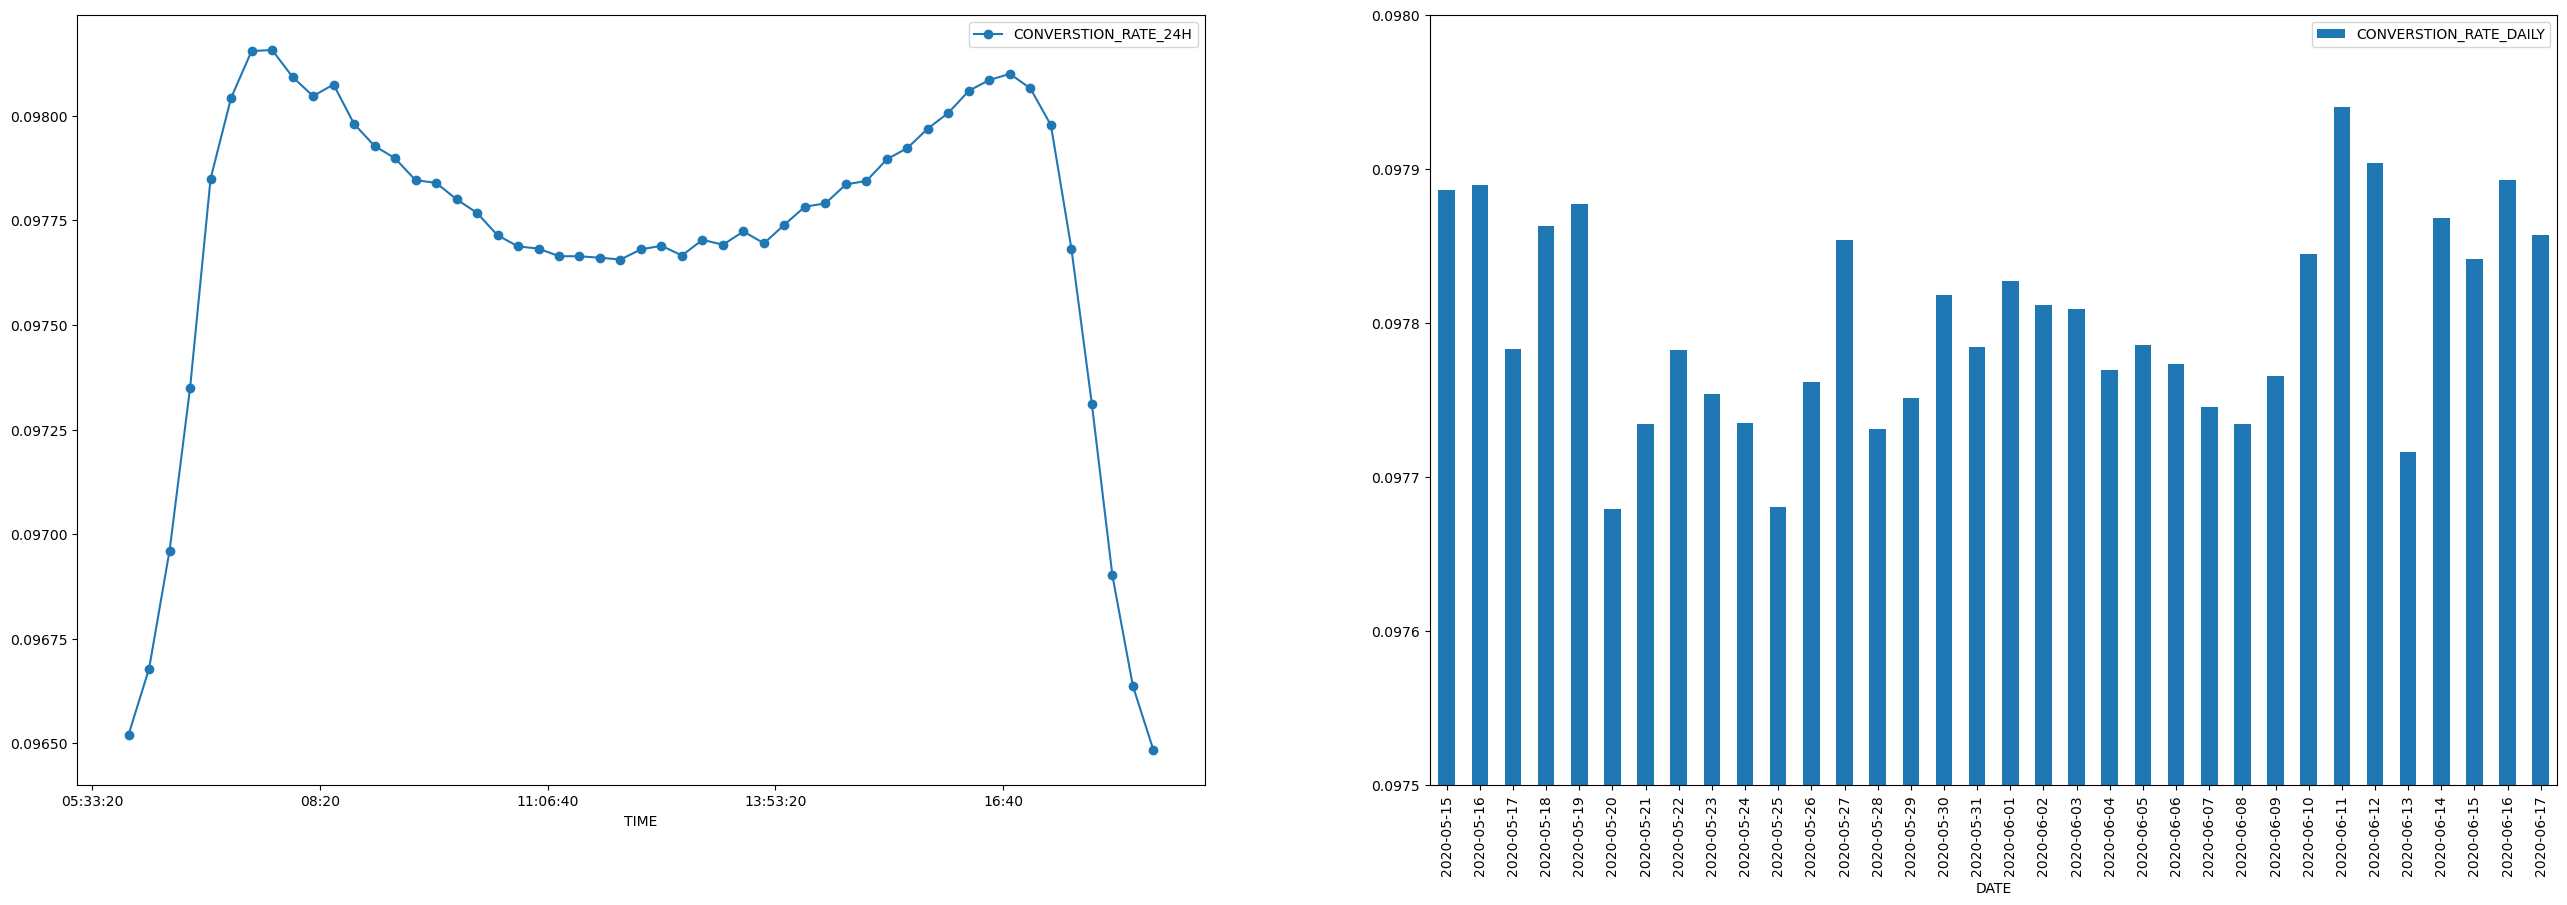

In [80]:
p1_g_24_meanLine['CONVERSTION_RATE_24H'] = p1_g_24_meanLine['AC_POWER'] / p1_g_24_meanLine['DC_POWER']
m_date = p1_g_24.groupby("DATE")[['AC_POWER', 'DC_POWER']].mean().reset_index()
m_date['CONVERSTION_RATE_DAILY'] = m_date['AC_POWER'] / m_date['DC_POWER']

fig, axes = plt.subplots(nrows=1, ncols=2)
ax = m_date.plot.bar(x='DATE', y='CONVERSTION_RATE_DAILY', ax=axes[1])
p1_g_24_meanLine.plot(x='TIME', y='CONVERSTION_RATE_24H', style = '-o', ax=axes[0], figsize=(32, 10))
plt.ylim(0.09750, 0.098)
plt.show()

## Checking the main difference between highest/lowest irradiation day

After all previous graph, we could've predicted an hypothesis between irradiance increasing temperature, increasing DC generation.
We'll see in this part if it's reaally the case.


## Determining the condition for a cell to perform at it's peak

